In [1]:
%matplotlib inline
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
file_paths = glob.glob(".\\data\\*")
print(file_paths)

['.\\data\\20200319_not_seating.csv', '.\\data\\20200319_seating.csv', '.\\data\\20200322a_not_seating.csv', '.\\data\\20200323a_seating.csv', '.\\data\\20200323b_not_seating.csv', '.\\data\\20200323c_not_seating.csv', '.\\data\\20200324a_seating.csv', '.\\data\\20200324b_seating.csv', '.\\data\\20200324c_not_seating.csv', '.\\data\\20200324d_not_seating.csv', '.\\data\\20200324f_seating.csv']


In [3]:
category =np.empty((0,1), float)
rssi =np.empty((0,100), float)

for file in file_paths:
    d = np.loadtxt(file, delimiter=',')
    category_tmp, rssi_tmp = np.hsplit(d, [1])
    rssi = np.concatenate([rssi, rssi_tmp], axis=0)
    category = np.concatenate([category, category_tmp], axis=0)

rssi = rssi * (-1) / 128
print("rssi array shape : ", rssi.shape)
#print(rssi)
category = tf.keras.utils.to_categorical(category, 2)
print("category array shape : ", category.shape)
#print(category)

rssi_train, rssi_test, category_train, category_test = train_test_split(rssi, category, test_size=0.2)
print("rssi training array shape : ", rssi_train.shape)
#print(rssi_train)
print("category training array shape : ", category_train.shape)
#print(category_train)
print("rssi test array shape : ", rssi_test.shape)
print("category test array shape : ", category_test.shape)

#train_data = tf.data.Dataset.from_tensor_slices((rssi_train, category_train))
#print(train_data)

rssi array shape :  (4568, 100)
category array shape :  (4568, 2)
rssi training array shape :  (3654, 100)
category training array shape :  (3654, 2)
rssi test array shape :  (914, 100)
category test array shape :  (914, 2)


In [4]:
# モデルを作成
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(100, ), activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(2, activation='softmax'))

# サマリーを出力
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 83,042
Trainable params: 83,042
Non-trainable params: 0
_________________________________________________________________


Train on 3654 samples, validate on 914 samples
Epoch 1/256
3654/3654 [==============================] - 1s 208us/sample - loss: 0.6536 - accuracy: 0.6579 - val_loss: 0.6522 - val_accuracy: 0.6543
Epoch 2/256
3654/3654 [==============================] - 0s 31us/sample - loss: 0.6498 - accuracy: 0.6579 - val_loss: 0.6521 - val_accuracy: 0.6543
Epoch 3/256
3654/3654 [==============================] - 0s 29us/sample - loss: 0.6490 - accuracy: 0.6579 - val_loss: 0.6492 - val_accuracy: 0.6543
Epoch 4/256
3654/3654 [==============================] - 0s 27us/sample - loss: 0.6482 - accuracy: 0.6579 - val_loss: 0.6452 - val_accuracy: 0.6543
Epoch 5/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.6452 - accuracy: 0.6579 - val_loss: 0.6425 - val_accuracy: 0.6543
Epoch 6/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.6410 - accuracy: 0.6579 - val_loss: 0.6394 - val_accuracy: 0.6543
Epoch 7/256
3654/3654 [==============================] - 0s 28us

Epoch 56/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3920 - accuracy: 0.8588 - val_loss: 0.4079 - val_accuracy: 0.8381
Epoch 57/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.4137 - accuracy: 0.8421 - val_loss: 0.4307 - val_accuracy: 0.8326
Epoch 58/256
3654/3654 [==============================] - 0s 27us/sample - loss: 0.3811 - accuracy: 0.8656 - val_loss: 0.3861 - val_accuracy: 0.8654
Epoch 59/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3852 - accuracy: 0.8618 - val_loss: 0.3792 - val_accuracy: 0.8632
Epoch 60/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3791 - accuracy: 0.8640 - val_loss: 0.3836 - val_accuracy: 0.8654
Epoch 61/256
3654/3654 [==============================] - 0s 34us/sample - loss: 0.3727 - accuracy: 0.8689 - val_loss: 0.3988 - val_accuracy: 0.8512
Epoch 62/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3791 - accuracy: 0.8621

Epoch 111/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3751 - accuracy: 0.8563 - val_loss: 0.3551 - val_accuracy: 0.8654
Epoch 112/256
3654/3654 [==============================] - 0s 27us/sample - loss: 0.3448 - accuracy: 0.8686 - val_loss: 0.3573 - val_accuracy: 0.8676
Epoch 113/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3389 - accuracy: 0.8719 - val_loss: 0.3685 - val_accuracy: 0.8567
Epoch 114/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3505 - accuracy: 0.8654 - val_loss: 0.3571 - val_accuracy: 0.8643
Epoch 115/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3493 - accuracy: 0.8667 - val_loss: 0.3701 - val_accuracy: 0.8534
Epoch 116/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3476 - accuracy: 0.8670 - val_loss: 0.3642 - val_accuracy: 0.8665
Epoch 117/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3461 - accuracy:

Epoch 220/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3306 - accuracy: 0.8730 - val_loss: 0.3526 - val_accuracy: 0.8742
Epoch 221/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3317 - accuracy: 0.8738 - val_loss: 0.4397 - val_accuracy: 0.8392
Epoch 222/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3455 - accuracy: 0.8700 - val_loss: 0.3698 - val_accuracy: 0.8621
Epoch 223/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3306 - accuracy: 0.8752 - val_loss: 0.3932 - val_accuracy: 0.8556
Epoch 224/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3318 - accuracy: 0.8733 - val_loss: 0.3772 - val_accuracy: 0.8621
Epoch 225/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3586 - accuracy: 0.8593 - val_loss: 0.3551 - val_accuracy: 0.8709
Epoch 226/256
3654/3654 [==============================] - 0s 28us/sample - loss: 0.3417 - accuracy:

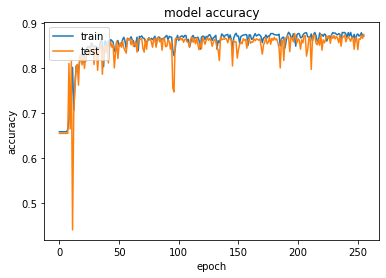

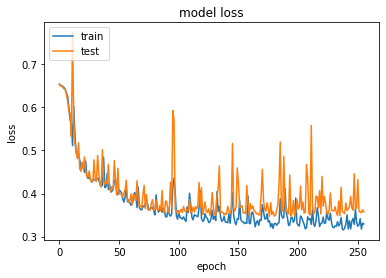

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(rssi_train, category_train,
                    batch_size=128,
                    epochs=256,
                    #verbose=1,
                    validation_data=(rssi_test, category_test))

#正答率
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
model.save('model/seating_detection_algorithm.h5', save_format='h5')

In [7]:
import tensorflow as tf
from tensorflow.keras import models
import numpy as np

model = models.load_model('model/seating_detection_algorithm.h5')

x = np.loadtxt(".\data\\20200319_seating.csv", delimiter=',')
#print("x array shape : ", x.shape)
#print(x)

x = x[0]
#print("x array shape : ", x.shape)
#print(x)
x = np.delete(x, 0)
#print("x array shape : ", x.shape)
#print(x)
x = x.reshape(1,100)
#print("x array shape : ", x.shape)
#print(x)
x = x * (-1) / 128
#print("x array shape : ", x.shape)
#print(x)

print(np.argmax(model.predict(x)))
#l = model.predict(x)

1
